<a href="https://colab.research.google.com/github/Lucky-Millare/CSST106-CS4B/blob/main/Feature-Extraction-Machine-Problem%233/4B-MILLARE-EXER3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 ### **Exercise 1. Harris Corner Detection**

1. Load Image

In [ ]:
image_path = '/content/drive/MyDrive/image.jpeg'
image = cv2.imread(image_path)

2. Convert in Grayscale

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

3. Apply Harris Corner Dtection

In [ ]:
corners = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
corners_dilated = cv2.dilate(corners, None)

# Thresholding to identify corners
threshold = 0.01 * corners_dilated.max()
image[corners_dilated > threshold] = [255, 100, 150]

4. Display Output

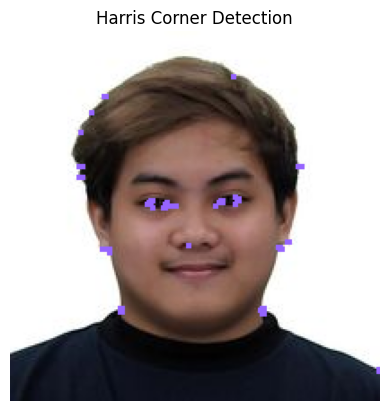

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

### **Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction**

Load Image

In [ ]:
image_path = '/content/drive/MyDrive/image.jpeg'
image = cv2.imread(image_path)

Convert to Grayscale

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Apply HOG

In [ ]:
# Apply HOG descriptor
hog_features, hog_image = hog(gray_image,
                               orientations=9,
                               pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2),
                               visualize=True)

# Rescale the HOG image for better visualization
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

Display Image

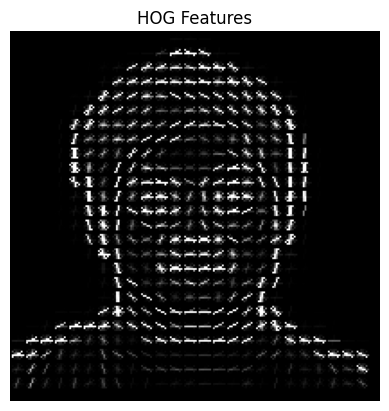

In [ ]:
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.axis('off')
plt.show()

### **Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection**

Load Image

In [ ]:
image_path = '/content/drive/MyDrive/image.jpeg'
image = cv2.imread(image_path)

Convert Image to grayscale

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Apply FAST

In [ ]:
fast = cv2.FastFeatureDetector_create()

Keypoints

In [ ]:
# Detect keypoints
keypoints = fast.detect(gray_image, None)

# Draw keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None)

Display Image

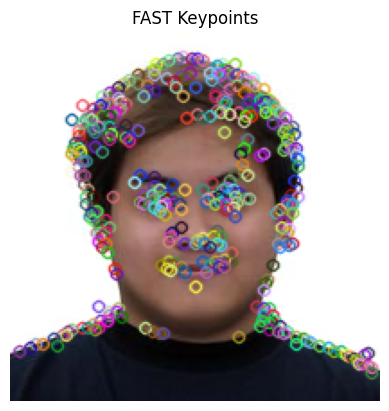

In [ ]:
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('FAST Keypoints')
plt.axis('off')
plt.show()

### **Exercise 4: Feature Matching using ORB and FLANN**


Load two Image

In [ ]:
image1_path = '/content/drive/MyDrive/image.jpeg'
image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)

image2_path = '/content/drive/MyDrive/image.jpeg'
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

Initialize Orb

In [ ]:
orb = cv2.ORB_create()

Keypoint and Descriptors

In [ ]:
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

Match features between the two images using the FLANN matcher.

In [ ]:
# FLANN parameters for ORB, using LSH index
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)  # Number of times the trees in the index are recursively traversed

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Ensure descriptors are uint8, which is expected for ORB with LSH
descriptors1 = descriptors1.astype(np.uint8) # convert to uint8
descriptors2 = descriptors2.astype(np.uint8) # convert to uint8


# Match descriptors using FLANN matcher
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Apply the ratio test to filter good matches (Lowe's ratio test)
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

Display Image

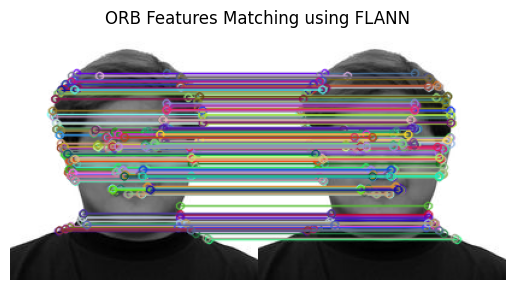

In [ ]:
plt.imshow(matched_image)
plt.title('ORB Features Matching using FLANN')
plt.axis('off')
plt.show()

### **Exercise 5: Image Segmentation using Watershed Algorithm**

Load Image

In [ ]:
image_path = '/content/drive/MyDrive/image.jpeg'
image = cv2.imread(image_path)

Convert to Grayscale

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Convert the image to binary using thresholding

In [ ]:
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

Find sure background and sure foreground using morphological operations

In [ ]:
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(binary_image, kernel, iterations=3)
dist_transform = cv2.distanceTransform(binary_image, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

Marker Labelling

In [ ]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

Apply Watershed Algorithm

In [ ]:
# Apply the Watershed algorithm
markers = cv2.watershed(image, markers)

# Mark boundaries in the original image where markers = -1
image[markers == -1] = [255, 100, 255]

Display Image

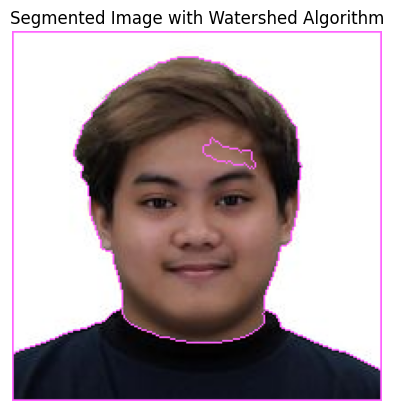

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image with Watershed Algorithm')
plt.axis('off')
plt.show()